## Gather the data

In [3]:
#import all packages necessary
import os
import re
import requests
from bs4 import BeautifulSoup
from timeit import default_timer as timer
import json
import tweepy


## Download the twitter-archive-enhanced.csv file

In [6]:
# Read in the twitter archived document
import pandas as pd
df_1 = pd.read_csv('twitter-archive-enhanced.csv')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From this first dataframe we know that there are 2356 tweet id's


## Download the image-predictions.tsv file and load

In [7]:
#Download file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
folder_name = 'folder_tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)
    

    

In [8]:

df_2 = pd.read_csv('image-predictions.tsv',sep = '\t+')
df_2.head()

C:\Users\goodness.folayan\AppData\Local\Temp\ipykernel_11580\1178674865.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_2 = pd.read_csv('image-predictions.tsv',sep = '\t+')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


From this dataframe, we know there are over 2000 tweet id's

## Query twitter using tweepy for the tweet_json.txt file

In [10]:
# Access the twitter API
import tweepy as tp

In [11]:
auth = tp.OAuth1UserHandler('xxxxxxxxxx'
, 'xxxxxxx','xxxxxxxxxxxxxxxx'
,'xxxxxxxxxxxxxxxx'
)
api = tp.API(auth)

In [12]:
#Define a function to extract the tweet id, retweet_count and favorite_count from a dataframe
#Write the result into a text file with a json format
# Create dict for the .csv document and load into a 'tweet_json.txt' file
# Access the twitter API
def json_text_maker(df,text_file):
    successes = 0 #count successful attempts
    failures = 0 #count failes attempts
    start = timer()
    fail_dict = {'tweet_id': [],
                 'error': []}
    with open (text_file, mode = 'w', encoding = 'utf-8') as file:    
        for id in df['tweet_id']:
            try:
                status = api.get_status(id, tweet_mode = 'extended')
                successes += 1
                json.dump(status._json, file)
                file.write('\n')
            except Exception as err:
                fail_dict['tweet_id'].append(id)
                fail_dict['error'].append(err)
                failures +=1
                pass
    end = timer()
    print(end - start)
    print(fail_dict)
    print(f"The number of successful attempts are {successes} and the rest are {failures} failures")


In [13]:
# Define a function to load the txt file into a pandas dataframe
def make_pandas(text_file):
    with open(text_file) as file:
        lines = file.readlines()
    data = []
    for line in lines:
        data.append(json.loads(line))
    df1 = pd.DataFrame(data)
    return df1
    

In [255]:
# Query the twitter api using tweepy and write the text file as tweet_json.txt
json_text_maker(df_1,'tweet_json_1.txt')



2677.1853084999893
{'tweet_id': [888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 856330835276025856, 851953902622658560, 851861385021730816, 845459076796616705, 844704788403113984, 842892208864923648, 837820167694528512, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 777189768882946048, 775096608509886464, 771004394259247104, 770743923962707968, 769940425801170949, 766864461642756096, 766793450729734144, 759923798737051648, 759566828574212096, 754011816964026368, 726828223124897792, 710272297844797440, 687102708889812993, 685681090388975616, 684481074559381504, 680055455951884288, 671891728106971137, 671882082306625538], 'error': [NotFound('404 Not Found\n144 - No status found with that ID.'), NotFound('404 Not Found\n144 - No status found with that ID.'), NotFound('404 Not Found\n144

In [14]:
#Create dataframe from the textfile
df_3 = make_pandas('tweet_json_1.txt')

In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2316 non-null   object 
 1   id                             2316 non-null   int64  
 2   id_str                         2316 non-null   object 
 3   full_text                      2316 non-null   object 
 4   truncated                      2316 non-null   bool   
 5   display_text_range             2316 non-null   object 
 6   entities                       2316 non-null   object 
 7   extended_entities              2047 non-null   object 
 8   source                         2316 non-null   object 
 9   in_reply_to_status_id          76 non-null     float64
 10  in_reply_to_status_id_str      76 non-null     object 
 11  in_reply_to_user_id            76 non-null     float64
 12  in_reply_to_user_id_str        76 non-null     o

Make copies of the dataframes to assist in our assessment


In [105]:
twitter_archive_df = df_1.copy()
image_predictions_df = df_2.copy()
tweepy_df = df_3.copy()

In [21]:
twitter_archive_df.to_csv('twitter_archive_df.csv', index = False)
image_predictions_df.to_csv('image_predictions_df.csv', index = False)
tweepy_df.to_csv('tweepy_df.csv', index = False)

## Assess all three datasets


### Twitter-archive.csv data


#### Visual Assessment

In [146]:

twitter_archive_df.head(30)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


 * Issues from visual assessment:
      * Invalid name of dogs such as "such", "
      * Name with small caps
      * Missing data dog stage columns e.g: 'doggo', 'floofer','pupper', ra etc.
      * Names with encoding issues Dev@n,Amaolie
      
      

#### Programmatic assessment

- Identify retweeted tweets:

In [123]:
repeated_tweets = twitter_archive_df.loc[twitter_archive_df["retweeted_status_user_id"].notna()]
repeated_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [127]:
# delete repeated tweets from dataset
twitter_archive_df.append(repeated_tweets).drop_duplicates(keep=False)

C:\Users\goodness.folayan\AppData\Local\Temp\ipykernel_11580\3533912885.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_archive_df.append(repeated_tweets).drop_duplicates(keep=False)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Tweets with no dog names:

In [150]:
twitter_archive_df[twitter_archive_df["name"]=="None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [169]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* Quality issues:
     * Columns with missing data
     * Names with small caps
     * Non plausible names e.g "such", "a"
     * Tweets with no dog names
     * retweeted tweets
     * Names with encoding issues Dev@n,Amaolie
     * Tweet_id should be object type and not integer


* Tidyness issue:
    *Doggo, floofer, pupper, puppo could be grouped together in one column called dog stage

 ## tweepy dataset

   ### Visual assessment

In [147]:
tweepy_df.head(50)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


Data quality issues:
-  Columns with missing or no data e.g created_at
-  id data type is an integer instead of object
-  created_at/date is object type instead of datetime
    

In [148]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2316 non-null   object 
 1   id                             2316 non-null   int64  
 2   id_str                         2316 non-null   object 
 3   full_text                      2316 non-null   object 
 4   truncated                      2316 non-null   bool   
 5   display_text_range             2316 non-null   object 
 6   entities                       2316 non-null   object 
 7   extended_entities              2047 non-null   object 
 8   source                         2316 non-null   object 
 9   in_reply_to_status_id          76 non-null     float64
 10  in_reply_to_status_id_str      76 non-null     object 
 11  in_reply_to_user_id            76 non-null     float64
 12  in_reply_to_user_id_str        76 non-null     o

### Programmatic assessment

In [108]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2316 non-null   object 
 1   id                             2316 non-null   int64  
 2   id_str                         2316 non-null   object 
 3   full_text                      2316 non-null   object 
 4   truncated                      2316 non-null   bool   
 5   display_text_range             2316 non-null   object 
 6   entities                       2316 non-null   object 
 7   extended_entities              2047 non-null   object 
 8   source                         2316 non-null   object 
 9   in_reply_to_status_id          76 non-null     float64
 10  in_reply_to_status_id_str      76 non-null     object 
 11  in_reply_to_user_id            76 non-null     float64
 12  in_reply_to_user_id_str        76 non-null     o

Assessment findings (data quality):
* Missing values for favorite_count, retweet_count etc
* quoted_status_id is float
* Retweeted data

In [149]:
tweepy_df.is_quote_status.unique()

array([False,  True])

In [153]:
#Identify retweeted tweets:
#repeated_tweets
repeated_tweets = tweepy_df.loc[tweepy_df["retweeted_status"].notna()]
repeated_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN
1011,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN
1209,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN
2219,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN


In [167]:
#drop Tweets
tweepy_df.drop(tweepy_df.index[tweepy_df.retweeted_status.notna()],inplace = True)

In [382]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          2055 non-null   object
 1   id_str              2055 non-null   object
 2   full_text           2055 non-null   object
 3   truncated           2055 non-null   bool  
 4   display_text_range  2055 non-null   object
 5   entities            2055 non-null   object
 6   source              2055 non-null   object
 7   user                2055 non-null   object
 8   is_quote_status     2055 non-null   bool  
 9   retweet_count       2055 non-null   int64 
 10  favorite_count      2055 non-null   int64 
 11  favorited           2055 non-null   bool  
 12  retweeted           2055 non-null   bool  
 13  lang                2055 non-null   object
dtypes: bool(4), int64(2), object(8)
memory usage: 184.6+ KB


Data quality issues:
* Missing values for favorite_count, retweet_count etc
* quoted_status_id is float
* Retweeted data
* Columns with missing or no data e.g created_at
* id data type is an integer instead of object
* created_at data type is object type instead of datetime

Tidyness issues:
* Entities and extended_entities column is a nested json data


We have enough data quality and tidyness issues to begin cleaning (we have identified and already cleaned some issues) . Here is the collection of all the issues:

### Twitter_archive_df table:
* Quality issues:
     * Columns with missing data
     * Names with small caps
     * Non plausible names e.g "None", "a"
     * Tweets with no dog names 
     * retweeted tweets 
     * Names with encoding issues Dev@n,Amaolie
     * Tweet_id should be object type and not integer
     


* Tidyness issue:
    *Doggo, floofer, pupper, puppo could be grouped together in one column called dog stage
    
### Tweepy_df table:
* Data quality issues:
    * Missing values for favorite_count, retweet_count etc
    * quoted_status_id is float
    * Retweeted data
    * Columns with missing or no data e.g created_at
    * id data type is an integer instead of object
    * created_at data type is object type instead of datetime

* Tidyness issues:
    * Entities and extended_entities column is a nested json data



## CLEANING

### Create copies of the dataframes

In [383]:
twitter_df = twitter_archive_df.copy()
tweepy_df = df_3.copy()

## Twitter_df

In [384]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [385]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define

* Drop columns with missing data with the drop method
* Drop non-original tweets with the drop method
* Use the title method to change the name of the dogs
* Use value_counts to get the most used name of dogs and use str.replace for invalid names e.g such, a
* Change tweet_id data type to str dtype
* Use dog_stage column for doggo, floofer, pupper and puppo and concat all four columns together.

### Code

In [386]:
#Drop columns with retweeted data with the drop, notna and index method
twitter_df.drop(twitter_df.index[twitter_df["in_reply_to_status_id"].notna()], inplace = True)
twitter_df.drop(twitter_df.index[twitter_df["retweeted_status_user_id"].notna()], inplace = True)
#Drop columns with no data
twitter_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace = True)

In [387]:
#Use title method for name column
twitter_df.name = twitter_df.name.str.title()

In [388]:
#Use value_counts to get the most used name of dogs and use str.replace for invalid names e.g a, None
twitter_df.name.value_counts()

None          603
A              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [389]:
#Use value_counts to get the most used name of dogs and use str.replace for invalid names e.g such, a
twitter_df.name = twitter_df.name.str.replace('A','Charlie')

In [390]:
#Change tweet_id data type to str dtype
twitter_df.tweet_id = twitter_df.tweet_id.astype(str)

In [391]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


In [392]:
#Use dog_stage column for doggo, floofer, pupper and puppo and concat all four columns together.
#create new column using the assign method
twitter_df.assign(dog_stage = '')
twitter_df["dog_stage"] = twitter_df.doggo + "|" +twitter_df.floofer + "|" + twitter_df.pupper + "|" + twitter_df.puppo
#use string slicing to seprate the dog name out
twitter_df["dog_stage"] = twitter_df["dog_stage"].str.split("|")
#drop all other columns
twitter_df.drop(columns=['doggo','floofer','pupper','puppo'], inplace = True)

In [393]:
for name in twitter_df["dog_stage"]:
    if name[0] == "doggo":
        twitter_df["dog_stage"] = "doggo"
    elif name[1] == "floofer":
        twitter_df["dog_stage"] = "floggo"
    elif name[2] == "pupper":
        twitter_df["dog_stage"] = "pupper"
    elif name[3] == "puppo":
        twitter_df["dog_stage"] = "puppo"
    else:
        twitter_df["dog_stage"] = "None"

### Test

In [397]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


In [398]:
twitter_df.name.value_counts()

None          603
Charlie        66
Lucy           11
Cooper         10
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 954, dtype: int64

In [379]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


## Tweepy_df dataframe

In [399]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2316 non-null   object 
 1   id                             2316 non-null   int64  
 2   id_str                         2316 non-null   object 
 3   full_text                      2316 non-null   object 
 4   truncated                      2316 non-null   bool   
 5   display_text_range             2316 non-null   object 
 6   entities                       2316 non-null   object 
 7   extended_entities              2047 non-null   object 
 8   source                         2316 non-null   object 
 9   in_reply_to_status_id          76 non-null     float64
 10  in_reply_to_status_id_str      76 non-null     object 
 11  in_reply_to_user_id            76 non-null     float64
 12  in_reply_to_user_id_str        76 non-null     o

### Define

* Drop columns for retweeted data using drop method and for-if loop
* drop id column with data type int with drop method 
* Drop columns with missing or no data e.g created_at

* Drop the entities column that is nested, since the data is not necessary to our overall objective. 

### Code

In [405]:
#Drop columns with retweeted data with the drop method and for, if loop
dropped_columns = ["in_reply_to_status_id","in_reply_to_status_id_str","in_reply_to_user_id_str",
                  "in_reply_to_user_id","in_reply_to_screen_name","quoted_status_id","quoted_status_id_str",
                  "quoted_status_permalink","quoted_status"]
for column in dropped_columns:
    tweepy_df.drop(tweepy_df.index[tweepy_df[column].notna()], inplace = True)

                   

#Drop columns with no data
tweepy_df.dropna(axis = 1, inplace= True)

In [410]:
#Drop entities column
tweepy_df.drop(columns = ['entities'], axis = 1, inplace = True)

In [411]:
#Drop tweet_id column
tweepy_df.drop(columns=['id'],axis = 1, inplace = True)

KeyError: "['id'] not found in axis"

### Test

In [412]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2315
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          2214 non-null   object
 1   id_str              2214 non-null   object
 2   full_text           2214 non-null   object
 3   truncated           2214 non-null   bool  
 4   display_text_range  2214 non-null   object
 5   source              2214 non-null   object
 6   user                2214 non-null   object
 7   is_quote_status     2214 non-null   bool  
 8   retweet_count       2214 non-null   int64 
 9   favorite_count      2214 non-null   int64 
 10  favorited           2214 non-null   bool  
 11  retweeted           2214 non-null   bool  
 12  lang                2214 non-null   object
dtypes: bool(4), int64(2), object(7)
memory usage: 181.6+ KB


## Storing Data

In [413]:
merged_df = pd.merge(twitter_df,tweepy_df,how="inner",left_on='tweet_id',right_on="id_str")

In [414]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2054 non-null   object
 1   timestamp           2054 non-null   object
 2   source_x            2054 non-null   object
 3   text                2054 non-null   object
 4   expanded_urls       2051 non-null   object
 5   rating_numerator    2054 non-null   int64 
 6   rating_denominator  2054 non-null   int64 
 7   name                2054 non-null   object
 8   dog_stage           2054 non-null   object
 9   created_at          2054 non-null   object
 10  id_str              2054 non-null   object
 11  full_text           2054 non-null   object
 12  truncated           2054 non-null   bool  
 13  display_text_range  2054 non-null   object
 14  source_y            2054 non-null   object
 15  user                2054 non-null   object
 16  is_quote_status     2054

In [415]:
merged_df.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data

In [421]:
import matplotlib.pyplot as plt
%matplotlib inline
merged_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,truncated,display_text_range,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tue Aug 01 16:23:56 +0000 2017,...,False,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6973,33701,False,False,en
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tue Aug 01 00:17:27 +0000 2017,...,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,5275,29215,False,False,en
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Charlierchie,None,Mon Jul 31 00:18:03 +0000 2017,...,False,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,3464,21976,False,False,en
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sun Jul 30 15:58:51 +0000 2017,...,False,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,7193,36795,False,False,en
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Sat Jul 29 16:00:24 +0000 2017,...,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,7719,35187,False,False,en


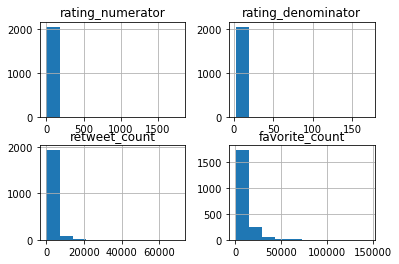

In [419]:
merged_df.hist();

Create a scatter plot of rating against favorite count and retweet count to determine how much correlated they are - Best guess is positive.

Text(0.5, 1.0, 'scatter plot of rating against favorite_count')

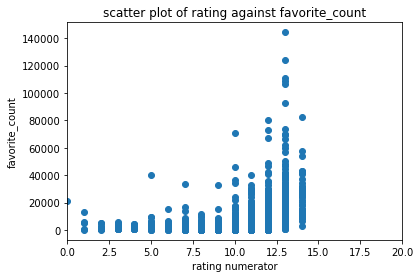

In [432]:
plt.scatter(merged_df.rating_numerator, merged_df.favorite_count)
plt.xlim([0,20])
plt.xlabel('rating numerator')
plt.ylabel('favorite_count')
plt.title('scatter plot of rating against favorite_count')

In plotting the rating numerator against favorite_count we see a positive correlation with an exponential like relationship


In [434]:
merged_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2054.000000,2054.00000,2054.000000,2054.000000
mean,12.191821,10.45813,2279.470789,7674.397274
std,40.784910,6.71397,4029.312122,11243.669357
min,0.000000,2.00000,11.000000,66.000000
25%,10.000000,10.00000,503.000000,1703.250000
50%,11.000000,10.00000,1099.500000,3491.000000
75%,12.000000,10.00000,2586.000000,9515.500000
max,1776.000000,170.00000,70351.000000,144287.000000


In [435]:
merged_df.rating_numerator.value_counts()

12      474
10      431
11      409
13      269
9       153
8        98
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [436]:
merged_df.rating_denominator.value_counts()

10     2037
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [437]:
merged_df.favorite_count.value_counts()

371      4
2578     4
3012     4
1148     3
276      3
        ..
9523     1
11500    1
7024     1
14938    1
2284     1
Name: favorite_count, Length: 1869, dtype: int64

Let us divide the rating numerator counts into groups called rating_numerator_gps:
- Low (lowest 25% of the rating)
- Medium (25% - 50%)
- High(50% -75%)
- Very High(> 75%)

In [464]:
# Bin edges that would be used to cut the data into groups
bin_edges = [0,10,11,12,14]
# Labels for rating_numerator groups
bin_groups = ['Low','Medium','High','Very_high']

In [465]:
# Create the rating_numberator groups
merged_df['rating_numerator_gps'] = pd.cut(merged_df['rating_numerator'],bin_edges, labels = bin_groups)
merged_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,truncated,display_text_range,source_y,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,rating_numerator_gps
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tue Aug 01 16:23:56 +0000 2017,...,False,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",False,6973,33701,False,False,en,Very_high
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tue Aug 01 00:17:27 +0000 2017,...,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",False,5275,29215,False,False,en,Very_high
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Charlierchie,None,Mon Jul 31 00:18:03 +0000 2017,...,False,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",False,3464,21976,False,False,en,High
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sun Jul 30 15:58:51 +0000 2017,...,False,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",False,7193,36795,False,False,en,Very_high
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Sat Jul 29 16:00:24 +0000 2017,...,False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",False,7719,35187,False,False,en,High


In [448]:
# Find the mean revenue of each rating_numerator group with groupby
merged_df.groupby(['rating_numerator_gps'])['retweet_count'].mean()

rating_numerator_gps
Low          1018.604953
Medium       1823.361858
High         2542.744726
Very_high    6027.101974
Name: retweet_count, dtype: float64

Define a function that returns the groupby method and bar chart of the groupby method 

In [449]:
def groupby_mean(dataframe,a,b):
    grouped = dataframe.groupby([a]).mean()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a + ' vs ' + b)

#def groupby_count(dataframe,a,b):
    grouped = dataframe.groupby([a]).count()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b +' count')
    plt.title(a + ' vs ' + b)

#def groupby_sum(dataframe,a,b):
    grouped = dataframe.groupby([a]).sum()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b + ' sum')
    plt.title(a + ' vs ' + b)

    
    

                      retweet_count
rating_numerator_gps               
Low                     1018.604953
Medium                  1823.361858
High                    2542.744726
Very_high               6027.101974


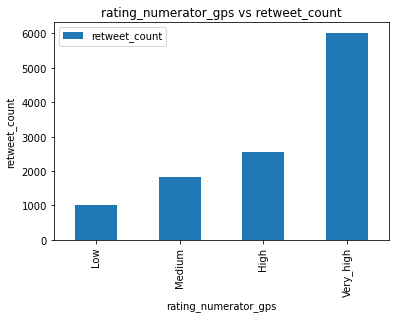

In [450]:
groupby_mean(merged_df,'rating_numerator_gps','retweet_count')

                      favorite_count
rating_numerator_gps                
Low                      2950.129717
Medium                   5923.154034
High                     9520.350211
Very_high               20411.713816


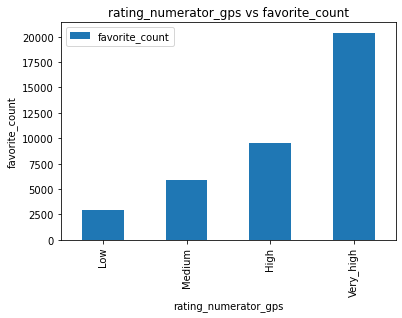

In [451]:
groupby_mean(merged_df,'rating_numerator_gps','favorite_count')

### Further insights:
- The bulk of the ratings lie between 1 and 13.
- A quarter of the ratings were 12/10 followed by 10/10
- The minimum retweet_count was 11 for a dog post.
- Retweet_count and favorite_count are positively correlated with the rating_numerator column

We will save this dataset to an improved version of the master dataset called twitter_archive_master_v2.csv that we shall use for our act_report

In [462]:
merged_df.to_csv('twitter_archive_master_v2.csv', index = False)